# Simulation Test

In [1]:
from code.Parameters import *
from code.Simulator import Simulator
from code.Utility import Utility
import matplotlib.pyplot as plt

In [2]:
# SIMULATION 
simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib )

Pos: 179410, len(new_vis): 463821
Pos: 377772, len(new_vis): 446867
InitPos: 134364, len(new_vis): 835299
Pos: 23455, len(new_vis): 408482
Pos: 285118, len(new_vis): 367594
InitPos: 446285, len(new_vis): 547753
InitPos: 262547, len(new_vis): 637021
Pos: 291309, len(new_vis): 460597
Pos: 446742, len(new_vis): 481617
InitPos: 141735, len(new_vis): 767300
InitPos: 122278, len(new_vis): 752899
InitPos: 251939, len(new_vis): 639781
InitPos: 263255, len(new_vis): 612929
InitPos: 394101, len(new_vis): 526102
Pos: 80244, len(new_vis): 321385
Pos: 140675, len(new_vis): 404972
Pos: 326794, len(new_vis): 337624
Pos: 417369, len(new_vis): 439537
Pos: 78831, len(new_vis): 118724
InitPos: 6130, len(new_vis): 701224
Pos: 89504, len(new_vis): 253706
Pos: 400874, len(new_vis): 418605
InitPos: 355015, len(new_vis): 454275
InitPos: 322208, len(new_vis): 599230
InitPos: 261290, len(new_vis): 437958
InitPos: 45459, len(new_vis): 673453
InitPos: 193677, len(new_vis): 567160
InitPos: 305629, len(new_vis): 69


Average Genome Length: 8168731.75 
Initial Genome Length: 8000000


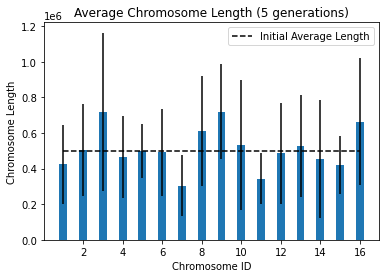

In [9]:
# AVERAGES
initial_genome_len = sum([len(seq) for id, seq in chromosome_table])
initial_ave_len = initial_genome_len / len(chromosome_table)
print("\nAverage Genome Length:", simul.average_genome_length, "\nInitial Genome Length:", initial_genome_len)

# BOX PLOT
fig, ax = plt.subplots()
plt.bar(range(1, len(chromosome_table) + 1), simul.average_chromosome_length, \
    yerr = simul.chr_length_st_dev, width = 0.4)
    
ax.plot([1., len(chromosome_table)], [initial_ave_len, initial_ave_len], "k--", label = "Initial Average Length")
plt.xlabel("Chromosome ID")
plt.ylabel("Chromosome Length")
plt.title(f"Average Chromosome Length ({number_of_generations} generations)")
plt.legend()
plt.show()

In [25]:
from scipy.sparse import *
simul.leaves[0].DNA.CHRs

[Chromosome(ID: 1, length: 150664, sequence: None),
 Chromosome(ID: 2, length: 371116, sequence: None),
 Chromosome(ID: 3, length: 500000, sequence: None),
 Chromosome(ID: 4, length: 417150, sequence: None),
 Chromosome(ID: 5, length: 458983, sequence: None),
 Chromosome(ID: 6, length: 1037915, sequence: None),
 Chromosome(ID: 7, length: 331677, sequence: None),
 Chromosome(ID: 8, length: 455013, sequence: None),
 Chromosome(ID: 9, length: 582496, sequence: None),
 Chromosome(ID: 10, length: 162545, sequence: None),
 Chromosome(ID: 11, length: 259106, sequence: None),
 Chromosome(ID: 12, length: 865159, sequence: None),
 Chromosome(ID: 13, length: 500000, sequence: None),
 Chromosome(ID: 14, length: 89015, sequence: None),
 Chromosome(ID: 15, length: 377436, sequence: None),
 Chromosome(ID: 16, length: 393353, sequence: None)]

KeyboardInterrupt: 

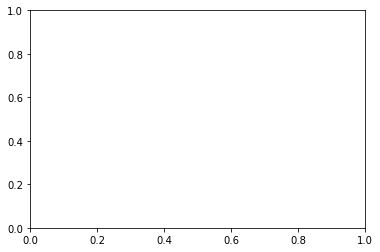

In [34]:
c = simul.leaves[0].DNA.CHRs[5].visual.todense().tolist()[0]
plt.bar(range(1, len(c) + 1), c)


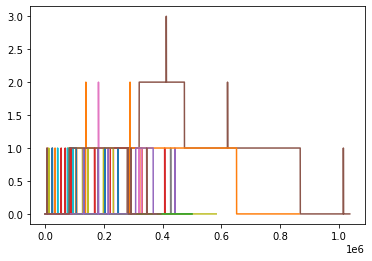

In [11]:
for i in range(16):
    c = simul.leaves[0].DNA.CHRs[i].visual.todense().tolist()[0]
    plt.plot(range(1, len(c) + 1), c)

In [6]:
a = [1,2,3,4,5,6,7,8,9]
b = a[:5] + a[5:]

In [7]:
import numpy as np 
c = np.array(b)

In [8]:
c+1

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])